# Airlines Satisfaction Report

- Nama: Bryan Herdianto
- Email: bryan.herdianto17@gmail.com

### Import Library yang Dibutuhkan

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scikit_posthocs as sp

In [2]:
airlines = pd.read_csv("airlines_final.csv")

airlines

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [3]:
dict = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}

categories = pd.DataFrame(dict)

categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [4]:
airlines.columns

Index(['Unnamed: 0', 'id', 'day', 'airline', 'destination', 'dest_region',
       'dest_size', 'boarding_area', 'dept_time', 'wait_min', 'cleanliness',
       'safety', 'satisfaction'],
      dtype='object')

### Clean Values

In [5]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



From the unique values above, we see that there is an error for the label in the 'Satisfaction', which is 'Somewhat satsified'. We can fix this error first.

In [6]:
airlines['satisfaction'] = airlines['satisfaction'].replace('Somewhat satsified', 'Somewhat satisfied')

Next, we can remove the column 'Unnamed: 0' because it has the same value as the index.

In [7]:
# Drop the unnamed column
airlines.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [9]:
# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [10]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday': 'weekday', 
            'Tuesday':'weekday', 
            'Wednesday': 'weekday', 
            'Thursday': 'weekday', 
            'Friday': 'weekday', 
            'Saturday': 'weekend', 
            'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [11]:
# Print the cleaned dataframe
airlines

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satisfied,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satisfied,long,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satisfied,long,weekday
2473,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium,weekday
2474,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,medium,weekday
2475,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,medium,weekday


In [12]:
airlines.isna().sum()

id               0
day              0
airline          0
destination      0
dest_region      0
dest_size        0
boarding_area    0
dept_time        0
wait_min         0
cleanliness      0
safety           0
satisfaction     0
wait_type        0
day_week         0
dtype: int64

### Data Understanding

In [13]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             2477 non-null   int64   
 1   day            2477 non-null   object  
 2   airline        2477 non-null   object  
 3   destination    2477 non-null   object  
 4   dest_region    2477 non-null   object  
 5   dest_size      2477 non-null   object  
 6   boarding_area  2477 non-null   object  
 7   dept_time      2477 non-null   object  
 8   wait_min       2477 non-null   float64 
 9   cleanliness    2477 non-null   object  
 10  safety         2477 non-null   object  
 11  satisfaction   2477 non-null   object  
 12  wait_type      2477 non-null   category
 13  day_week       2477 non-null   object  
dtypes: category(1), float64(1), int64(1), object(11)
memory usage: 254.2+ KB


In [14]:
airlines.describe()

,id,wait_min
count,2477.000000,2477.000000
mean,1813.363746,166.084376
std,945.226305,107.643625
min,1.000000,15.000000
25%,1038.000000,105.000000
50%,1859.000000,145.000000
75%,2581.000000,185.000000
max,9004.000000,1365.000000


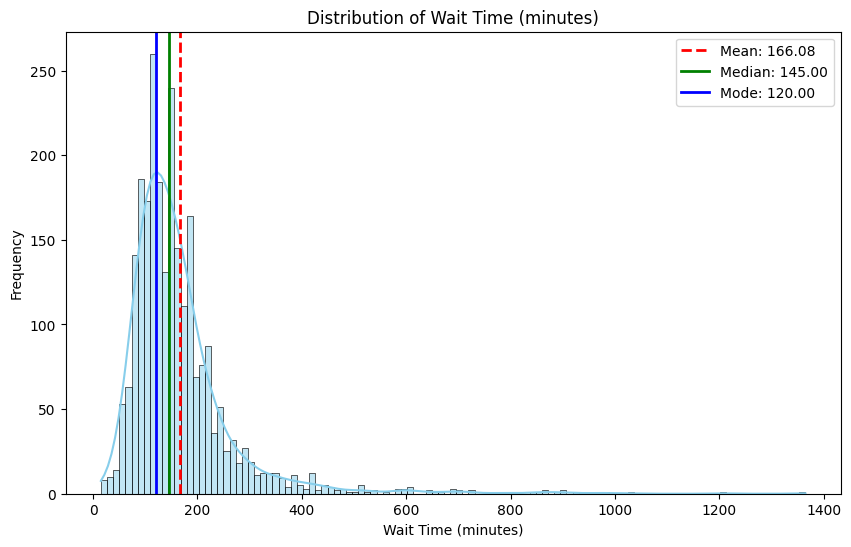

In [15]:
# Calculate statistics
mean_val = airlines['wait_min'].mean()
median_val = airlines['wait_min'].median()
mode_val = airlines['wait_min'].mode()[0]  # Mode can return multiple values, take the first one

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram of wait_min
sns.histplot(airlines['wait_min'], kde=True, color='skyblue', ax=ax)

# Add lines for mean, median, and mode
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
ax.axvline(mode_val, color='blue', linestyle='-', linewidth=2, label=f'Mode: {mode_val:.2f}')

# Add legend
ax.legend()

# Add labels and title
ax.set_title('Distribution of Wait Time (minutes)')
ax.set_xlabel('Wait Time (minutes)')
ax.set_ylabel('Frequency')

# Show plot
plt.show()

From the histogram above, we can see that the data is right-skewed (with the tail on the right). Therefore, the median is the appropriate measure of central tendency, indicating a typical wait time of 145 minutes. However, there are some outliers with wait times exceeding 1,200 minutes. Since most of the data is clustered on the left side, a wait time of 145 minutes suggests that many passengers experience shorter wait times compared to these outliers.

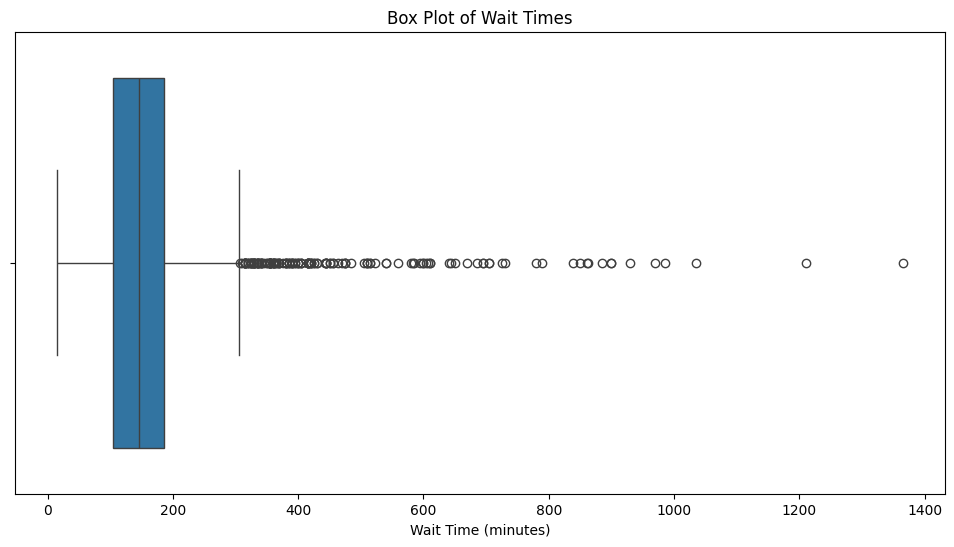

In [16]:
# Creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=airlines['wait_min'])
plt.title('Box Plot of Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.show()

A narrow box indicates that the middle 50% of the data is tightly clustered, suggesting lower variability among these central values. Short whiskers suggest that the data is fairly concentrated around the quartiles, with relatively few extreme values beyond this range. A large number of outliers or outliers that are very far from the box might indicate significant issues with wait times, such as operational inefficiencies or rare but extreme delays.

Therefore, we can conclude that most passengers experience short and consistent waiting times with little variability, but in very rare instances, some passengers may experience very long waiting times. The presence of extreme long wait times may negatively affect overall customer satisfaction and should be addressed. Are these long waits happening at specific times, with certain airlines, or at particular boarding areas? Addressing these could enhance overall customer satisfaction.

In [17]:
def autopct_format(values):
    def my_autopct(pct):
        return f'{pct:.1f}%' if pct > 3 else ''  # Display if the percentage is greater than 3%
    return my_autopct

def make_pie(col):
    plt.figure(figsize=(12, 8))
    plt.pie(airlines[col].value_counts(), labels=None, autopct=autopct_format(airlines[col].value_counts()), startangle=140, pctdistance=0.8)
    plt.legend(airlines[col].value_counts().index, title=f"{col}", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'{col} Distribution')
    plt.show()

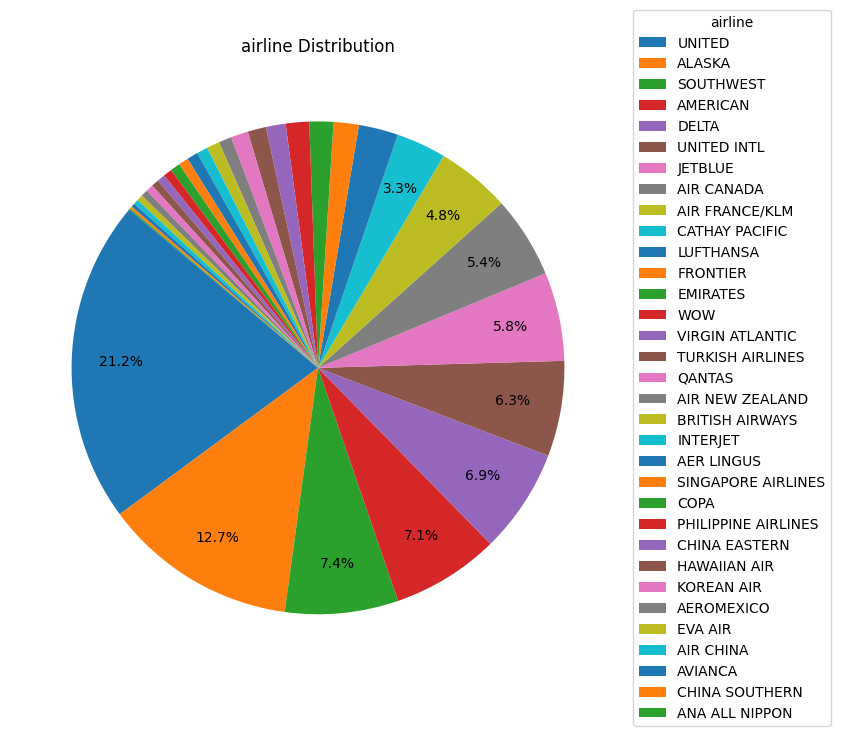

In [18]:
make_pie('airline')

North American Dominance:
- The top of the list is dominated by North American airlines (like United, Alaska, Southwest, American, Delta, etc.), which suggests that a significant portion of the passengers likely use airlines native to North America.

Less Frequent Use of Non-North American Airlines:
- Airlines from regions outside North America (like Emirates, Singapore Airlines, Lufthansa, etc.) appear lower in the ranking, implying that they are less frequently used by the passengers represented in this data.

Explanation:
- If this data is from a North American airport or a region predominantly served by North American airlines, the results would naturally skew towards those airlines.

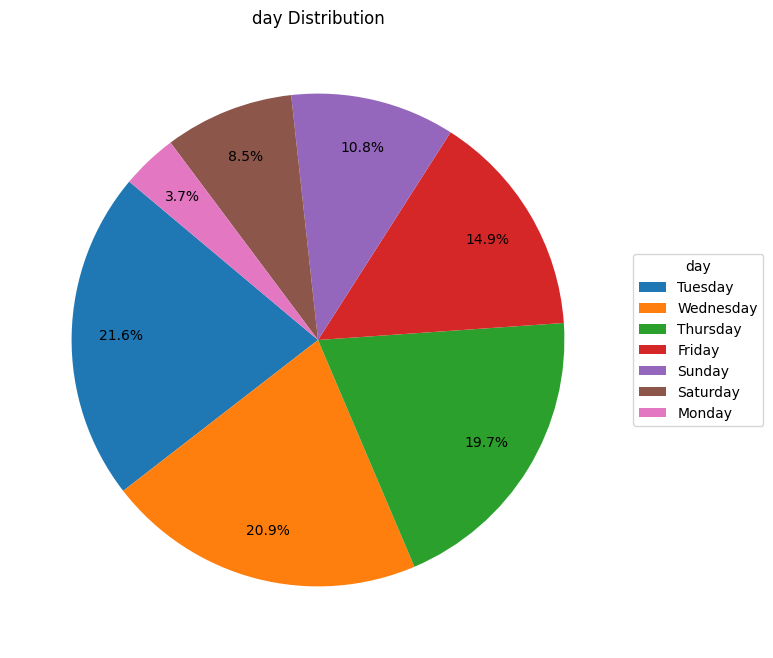

In [19]:
make_pie('day')

Most people tend to use airlines on Tuesday, Wednesday, and Thursday. Two possible reasons for this are as follows: First, after a long weekend, people may feel lazy and prefer not to travel on Monday. Second, airline prices tend to increase on weekends, particularly on Saturday and Sunday, due to higher demand during the holidays.

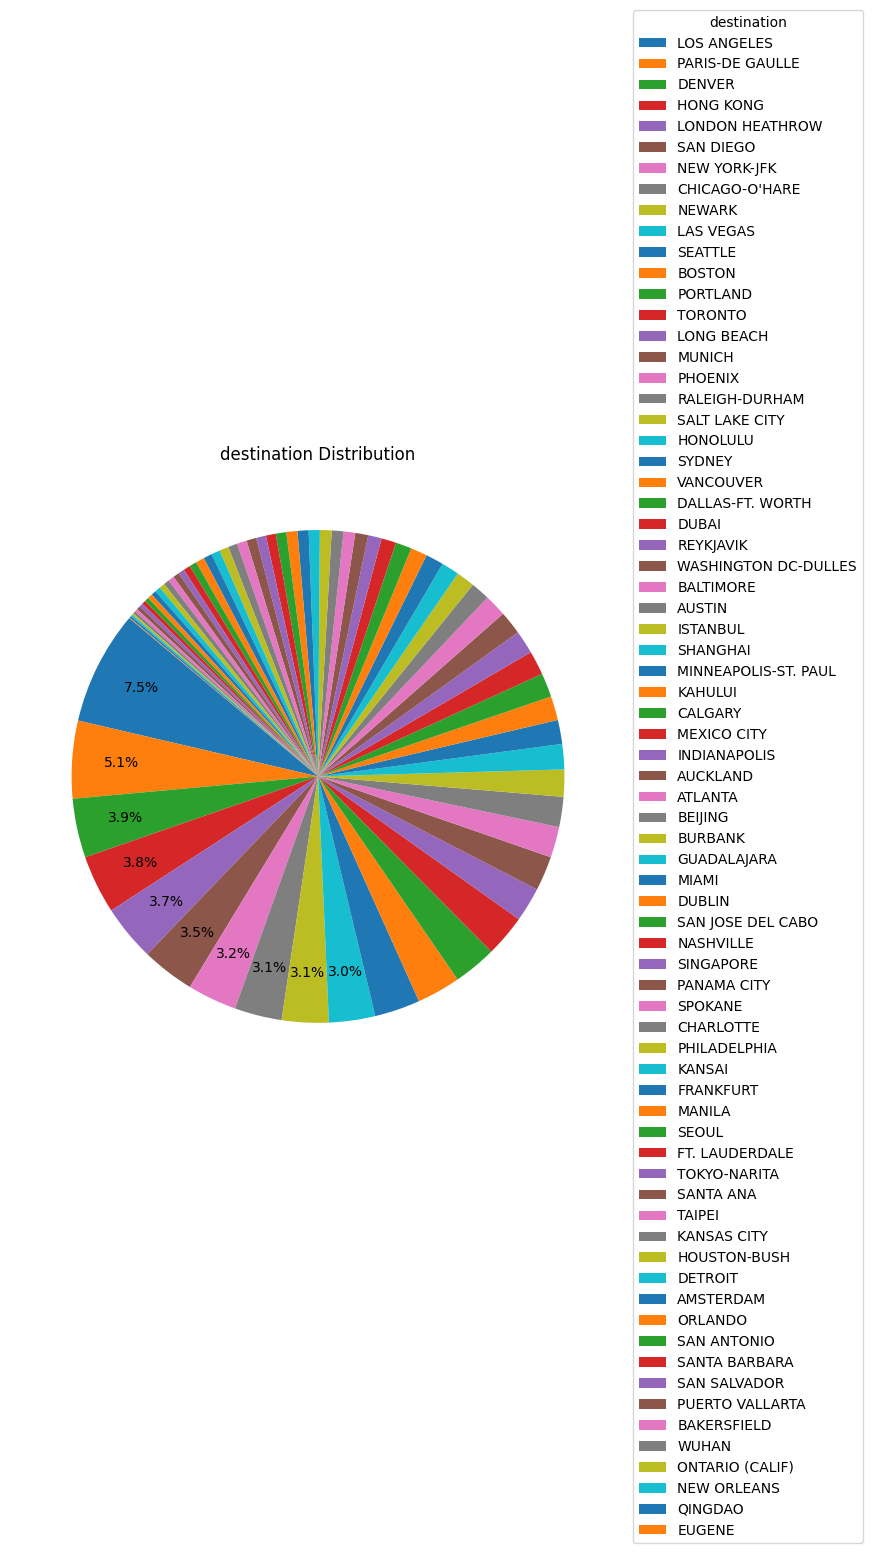

In [20]:
make_pie('destination')

1. Major Hubs and Transit Points:
- Los Angeles (LAX), Denver (DEN), New York-JFK (JFK), Chicago-O'Hare (ORD), Newark (EWR), and Seattle (SEA) are major hubs in the United States. They serve as central transit points for both domestic and international flights. Passengers often travel to these airports to connect to other flights.
- London Heathrow (LHR) and Paris-De Gaulle (CDG) are among the busiest international hubs in Europe. They serve as primary gateways for transatlantic travel between Europe and North America, and passengers might be using them as layover points or final destinations.
2. Popular Tourist Destinations:
- Las Vegas (LAS) is one of the most popular tourist destinations in the world, known for its entertainment, casinos, and conventions.
- San Diego (SAN), Boston (BOS), and Los Angeles (LAX) are also popular tourist destinations, attracting visitors for their cultural, historical, and recreational offerings.

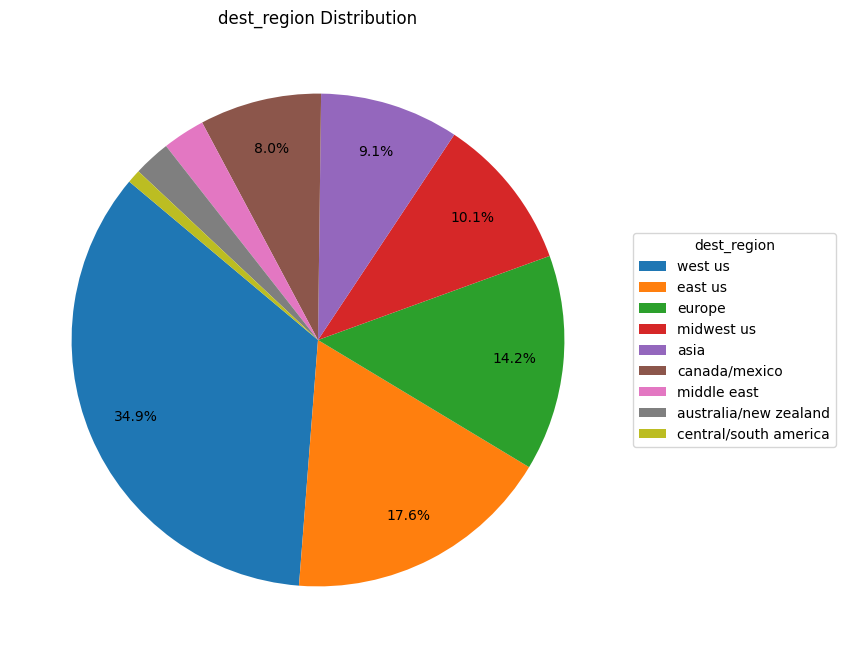

In [21]:
make_pie('dest_region')

The top three destination regions are West US, East US, and Europe. This result aligns with the fact that most respondents use North American airlines. West US holds the top spot due to the abundance of popular attractions in the region. East US follows, also benefiting from its attractions and being a major hub for business and travel. Europe ranks highly as well, likely due to its business, cultural, and historical significance, making it a favored destination for international travelers.

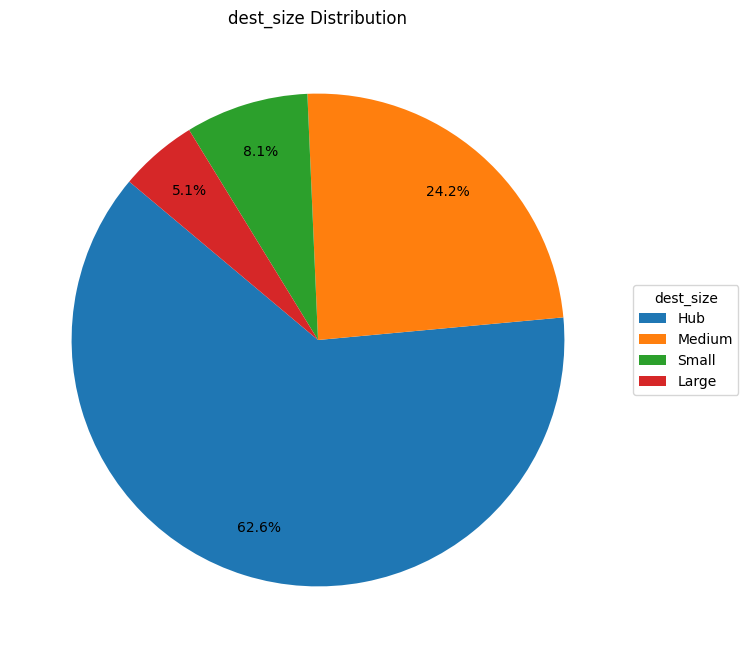

In [22]:
make_pie('dest_size')

The majority of flights appear to be directed toward hub destinations, constituting approximately 62.6% of the total. Medium-sized destinations account for about 24.2%, while large destinations have the smallest share at 5.1%. This distribution suggests that the airline(s) may strategically focus on hub airports or regional routes, while large airports receive fewer flights.

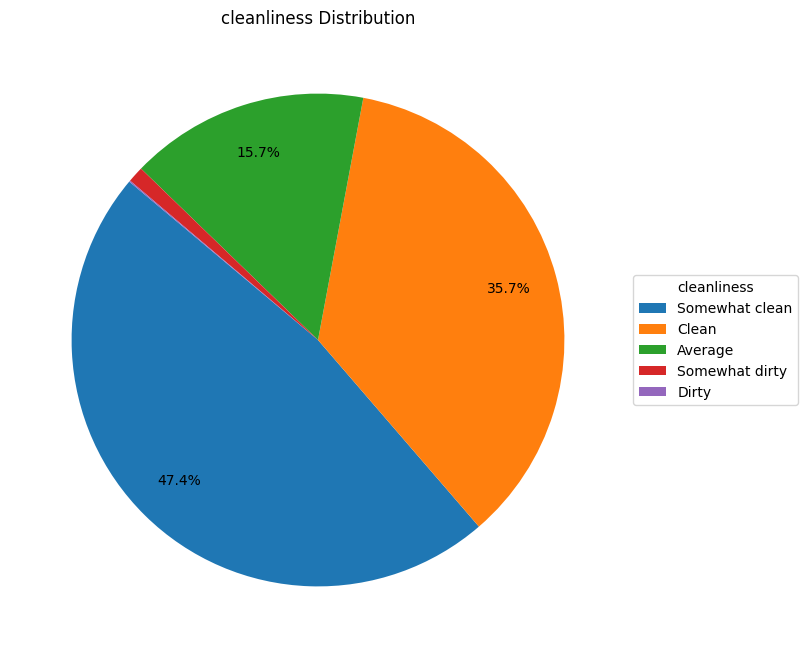

In [23]:
make_pie('cleanliness')

Almost half of the respondents rated their flight as 'Somewhat clean.' This was followed by 'Clean' and 'Average,' with 35.7% and 15.7%, respectively. Therefore, it is reasonable to conclude that most flights are considered clean.

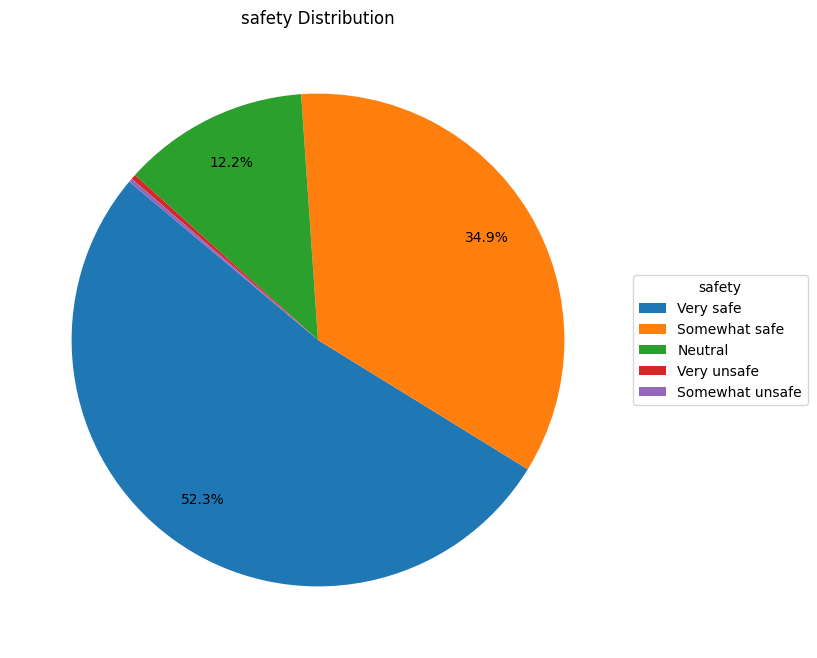

In [24]:
make_pie('safety')

More than half of the respondents ranked the airline as "very safe." This is followed by "somewhat safe" and "neutral" at 34.9% and 12.2%, respectively. Only a small minority of respondents rated the airline as "very unsafe" or "somewhat unsafe." Therefore, we can conclude that most people consider the airline to be safe.

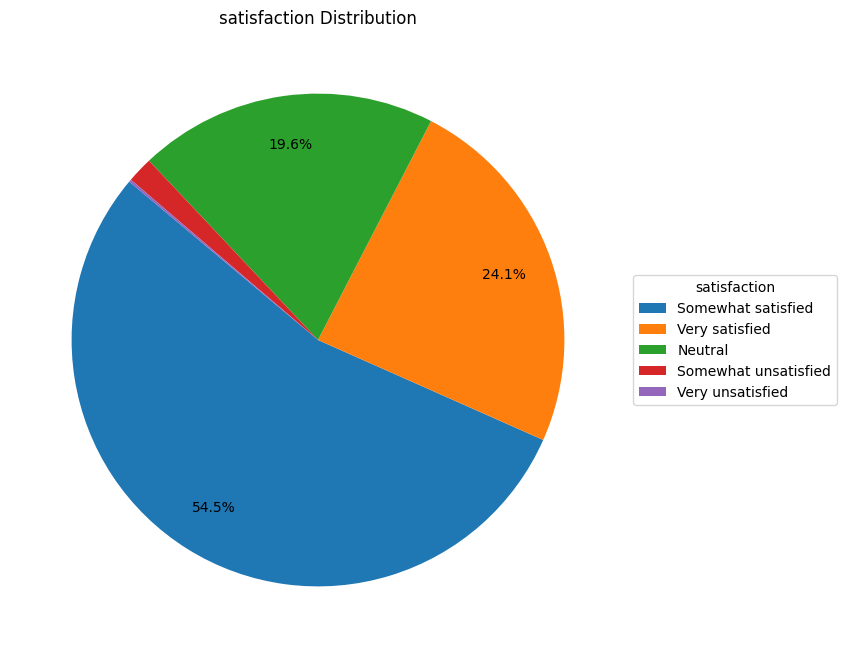

In [25]:
make_pie('satisfaction')

The pie chart illustrates the distribution of passenger satisfaction with airlines, categorized into five levels: "Very satisfied," "Somewhat satisfied," "Neutral," "Somewhat unsatisfied," and "Very unsatisfied." 

From the chart, it is evident that the majority of respondents, at 54.5%, fall under the "Somewhat satisfied" category. This indicates that while a significant portion of passengers are pleased with the services provided by the airlines, they may not be completely content.

The second-largest segment, comprising 24.1% of respondents, is "Very satisfied." This suggests that nearly a quarter of passengers have a highly positive view of the airline services, reflecting strong performance in some aspects of customer service.

Following this, 19.6% of respondents are "Neutral," implying that these passengers had neither a particularly positive nor negative experience. This could indicate areas where the airlines meet basic expectations but fail to exceed them.

The "Somewhat unsatisfied" category accounts for a small percentage of the responses, and the "Very unsatisfied" group is even smaller. These figures suggest that a very small minority of passengers had negative experiences with the airlines.

In conclusion, the chart demonstrates that while the majority of passengers are satisfied with their airline experiences to some extent, there is still room for improvement, particularly in converting those who are only "Somewhat satisfied" or "Neutral" into more strongly satisfied customers. The low percentages of dissatisfaction reflect positively on the overall quality of service provided by the airlines.

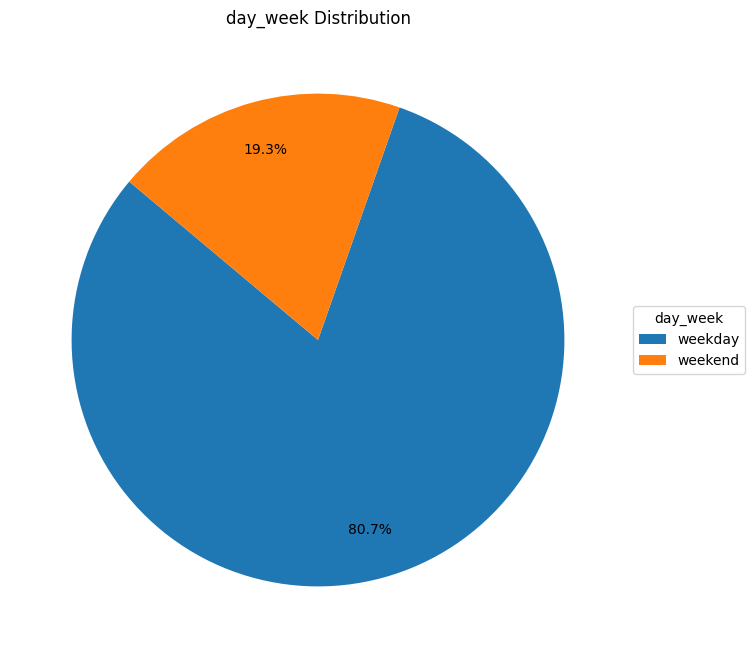

In [26]:
make_pie('day_week')

An astounding 81% of respondents prefer to fly on weekdays rather than on weekends. This may be attributed to the fact that weekends are often considered holidays, which can affect the cost of flights.

### Finding Correlation

In [53]:
def calc_chi_square(col1, col2):   
    # Cross-tabulation
    cross_tab = pd.crosstab(airlines[col1], airlines[col2])
    
    # Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    
    # Display results
    print("Cross Tabulation:")
    print(cross_tab)
    print(f"\nChi-Square Statistic: {chi2}")
    print(f"p-value: {p}")

calc_chi_square('airline', 'dest_region')

Cross Tabulation:
dest_region          asia  australia/new zealand  canada/mexico  \
airline                                                           
AER LINGUS              0                      0              0   
AEROMEXICO              0                      0             11   
AIR CANADA              0                      0            133   
AIR CHINA               8                      0              0   
AIR FRANCE/KLM          0                      0              0   
AIR NEW ZEALAND         0                     21              0   
ALASKA                  0                      0             16   
AMERICAN                0                      0              0   
ANA ALL NIPPON          2                      0              0   
AVIANCA                 0                      0              0   
BRITISH AIRWAYS         0                      0              0   
CATHAY PACIFIC         81                      0              0   
CHINA EASTERN          13                   

In [54]:
calc_chi_square('cleanliness', 'satisfaction')

Cross Tabulation:
satisfaction    Very satisfied  Somewhat satisfied  Neutral  \
cleanliness                                                   
Average                     13                 159      190   
Clean                      459                 368       55   
Dirty                        0                   0        1   
Somewhat clean             124                 817      224   
Somewhat dirty               0                   5       16   

satisfaction    Somewhat unsatisfied  Very unsatisfied  
cleanliness                                             
Average                           25                 2  
Clean                              2                 1  
Dirty                              0                 1  
Somewhat clean                    10                 0  
Somewhat dirty                     5                 0  

Chi-Square Statistic: 1247.951058537816
p-value: 7.577131505517987e-256


In [55]:
calc_chi_square('safety', 'satisfaction')

Cross Tabulation:
satisfaction     Very satisfied  Somewhat satisfied  Neutral  \
safety                                                         
Neutral                      32                 132      122   
Somewhat safe               113                 529      202   
Somewhat unsafe               0                   3        2   
Very safe                   447                 682      159   
Very unsafe                   4                   3        1   

satisfaction     Somewhat unsatisfied  Very unsatisfied  
safety                                                   
Neutral                            16                 1  
Somewhat safe                      17                 3  
Somewhat unsafe                     1                 0  
Very safe                           8                 0  
Very unsafe                         0                 0  

Chi-Square Statistic: 296.95719765719844
p-value: 1.0879371188288238e-53


The Chi-Square test results indicate a significant correlation between the two variables being analyzed in each case. For the relationship between **safety and satisfaction**, a Chi-Square statistic of 296.96 with a p-value of approximately \(1.09 \times 10^{-53}\) suggests a strong association. The very low p-value indicates that the observed distribution of satisfaction levels across different safety ratings is highly unlikely to occur by chance. Therefore, safety appears to have a significant impact on customer satisfaction.

In the case of **cleanliness and satisfaction**, the Chi-Square statistic is even higher at 1247.95, with an extremely small p-value of about \(7.58 \times 10^{-256}\). This result strongly supports the idea that there is a significant correlation between how customers perceive cleanliness and their overall satisfaction. The high Chi-Square value reflects a substantial difference between the observed and expected frequencies, meaning cleanliness likely plays a crucial role in determining customer satisfaction levels.

Finally, the relationship between **airline type and destination region** shows an exceptionally high Chi-Square statistic of 13,977.40, with a p-value effectively at 0. This extremely high statistic, coupled with the p-value, suggests a very strong and statistically significant correlation between the airline type and the regions they serve. The magnitude of the Chi-Square statistic indicates that the distribution of airline types across destination regions is far from random, reinforcing the idea that certain airlines are more likely to operate in specific regions. In each of these cases, the Chi-Square test has confirmed that there is a meaningful association between the variables analyzed.

In [62]:
# Define the order of the categories
satisfaction_order = ['Very satisfied', 'Somewhat satisfied', 'Neutral', 'Somewhat unsatisfied', 'Very unsatisfied']

# Convert to ordered categorical type
airlines['satisfaction'] = pd.Categorical(airlines['satisfaction'], categories=satisfaction_order, ordered=True)

# Encode the satisfaction column
airlines['satisfaction_encoded'] = airlines['satisfaction'].cat.codes

# Calculate Spearman rank correlation
spearman_corr = airlines['satisfaction_encoded'].corr(airlines['wait_min'], method='spearman')
print(f"Spearman Correlation between Satisfaction and Wait Time: {spearman_corr}")

Spearman Correlation between Satisfaction and Wait Time: 0.031859000843235556


The Spearman correlation between satisfaction and wait time is 0.0319, which indicates a very weak positive correlation. This means that there is almost no relationship between how long customers wait and their overall satisfaction. Interestingly, this result is somewhat counter-intuitive; we might expect that longer wait times would significantly decrease customer satisfaction. However, the data suggests that wait time does not have a strong impact on how satisfied customers feel.

This finding highlights the importance of relying on data and statistical analysis rather than assumptions or intuition. While it might seem obvious that wait time would influence satisfaction, the weak correlation revealed by the data challenges this notion. It underscores the value of empirical evidence in making informed decisions and understanding the true drivers of customer satisfaction. By relying on data, businesses can avoid misguided strategies and focus on factors that genuinely influence customer experiences.

### Hypothesis Testing

In [64]:
# Define the order of the categories
cleanliness_order = ['Clean', 'Somewhat clean', 'Average', 'Somewhat dirty', 'Dirty']
safety_order = ['Very safe', 'Somewhat safe', 'Neutral', 'Somewhat unsafe', 'Very unsafe']

# Convert to ordered categorical type
airlines['cleanliness'] = pd.Categorical(airlines['cleanliness'], categories=cleanliness_order, ordered=True)
airlines['safety'] = pd.Categorical(airlines['safety'], categories=safety_order, ordered=True)

# Convert ordinal variables into encoded form
airlines['cleanliness_encoded'] = airlines['cleanliness'].cat.codes
airlines['safety_encoded'] = airlines['safety'].cat.codes

In [65]:
# Look at the updated info from the DataFrame
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    2477 non-null   int64   
 1   day                   2477 non-null   object  
 2   airline               2477 non-null   object  
 3   destination           2477 non-null   object  
 4   dest_region           2477 non-null   object  
 5   dest_size             2477 non-null   object  
 6   boarding_area         2477 non-null   object  
 7   dept_time             2477 non-null   object  
 8   wait_min              2477 non-null   float64 
 9   cleanliness           2477 non-null   category
 10  safety                2477 non-null   category
 11  satisfaction          2477 non-null   category
 12  wait_type             2477 non-null   category
 13  day_week              2477 non-null   object  
 14  satisfaction_encoded  2477 non-null   int8    
 15  clea

In [68]:
# Contingency tables for each categorical variable with respect to airlines
cleanliness_table = pd.crosstab(airlines['airline'], airlines['cleanliness'])
safety_table = pd.crosstab(airlines['airline'], airlines['safety'])
satisfaction_table = pd.crosstab(airlines['airline'], airlines['satisfaction'])

# Perform Chi-Square tests
chi2_cleanliness, p_cleanliness, _, _ = stats.chi2_contingency(cleanliness_table)
chi2_safety, p_safety, _, _ = stats.chi2_contingency(safety_table)
chi2_satisfaction, p_satisfaction, _, _ = stats.chi2_contingency(satisfaction_table)

print(f"Chi-Square Test for Cleanliness and Airline: Chi2 = {chi2_cleanliness}, p-value = {p_cleanliness}")
print(f"Chi-Square Test for Safety and Airline: Chi2 = {chi2_safety}, p-value = {p_safety}")
print(f"Chi-Square Test for Satisfaction and Airline: Chi2 = {chi2_satisfaction}, p-value = {p_satisfaction}")

Chi-Square Test for Cleanliness and Airline: Chi2 = 237.23501980423683, p-value = 1.513452652782549e-08
Chi-Square Test for Safety and Airline: Chi2 = 122.91126964765103, p-value = 0.6104680453896023
Chi-Square Test for Satisfaction and Airline: Chi2 = 214.57251210188443, p-value = 2.540851879185789e-06


In [69]:
# Perform Kruskal-Wallis test on wait times across different airlines
kruskal_stat, kruskal_p = stats.kruskal(*[group['wait_min'].values for name, group in airlines.groupby('airline')])

print(f"Kruskal-Wallis Test for Wait Times across Airlines: H-statistic = {kruskal_stat}, p-value = {kruskal_p}")

Kruskal-Wallis Test for Wait Times across Airlines: H-statistic = 544.9994765346455, p-value = 1.2397980236898077e-94


In [70]:
if p_cleanliness < 0.05:
    print("There is a significant association between cleanliness and airline preference.")
else:
    print("No significant association between cleanliness and airline preference.")

if p_safety < 0.05:
    print("There is a significant association between safety and airline preference.")
else:
    print("No significant association between safety and airline preference.")

if p_satisfaction < 0.05:
    print("There is a significant association between satisfaction and airline preference.")
else:
    print("No significant association between satisfaction and airline preference.")

if kruskal_p < 0.05:
    print("There is a significant difference in wait times across airlines, which could indicate a preference.")
else:
    print("No significant difference in wait times across airlines.")

There is a significant association between cleanliness and airline preference.
No significant association between safety and airline preference.
There is a significant association between satisfaction and airline preference.
There is a significant difference in wait times across airlines, which could indicate a preference.


The analysis reveals that there is a significant association between cleanliness and airline preference, as well as between satisfaction and airline preference. Additionally, there is a significant difference in wait times across airlines, which could indicate a preference for certain airlines. However, the data shows no significant association between safety and airline preference, suggesting that safety is not a major factor in choosing a favorite airline. Given these findings, we will next determine which airline is the most favored among the respondents.

In [82]:
# Perform Dunn's Test
dunn_test_result = sp.posthoc_dunn(airlines, val_col='wait_min', group_col='airline')
print(dunn_test_result)

                       AER LINGUS  AEROMEXICO    AIR CANADA  AIR CHINA  \
AER LINGUS           1.000000e+00    0.209273  2.283567e-02   0.444536   
AEROMEXICO           2.092732e-01    1.000000  7.714372e-01   0.737658   
AIR CANADA           2.283567e-02    0.771437  1.000000e+00   0.497832   
AIR CHINA            4.445365e-01    0.737658  4.978324e-01   1.000000   
AIR FRANCE/KLM       2.852879e-01    0.504144  1.661027e-02   0.880720   
AIR NEW ZEALAND      9.980287e-01    0.195954  1.477439e-02   0.433132   
ALASKA               5.153183e-06    0.041851  2.538316e-07   0.029389   
AMERICAN             4.942736e-07    0.013955  4.892672e-09   0.010954   
ANA ALL NIPPON       6.686464e-01    0.833598  7.228720e-01   0.994090   
AVIANCA              9.048725e-02    0.531589  5.875698e-01   0.380988   
BRITISH AIRWAYS      2.762833e-01    0.725240  3.445483e-01   0.952349   
CATHAY PACIFIC       5.320778e-01    0.322821  3.722974e-03   0.661913   
CHINA EASTERN        2.034197e-01    0

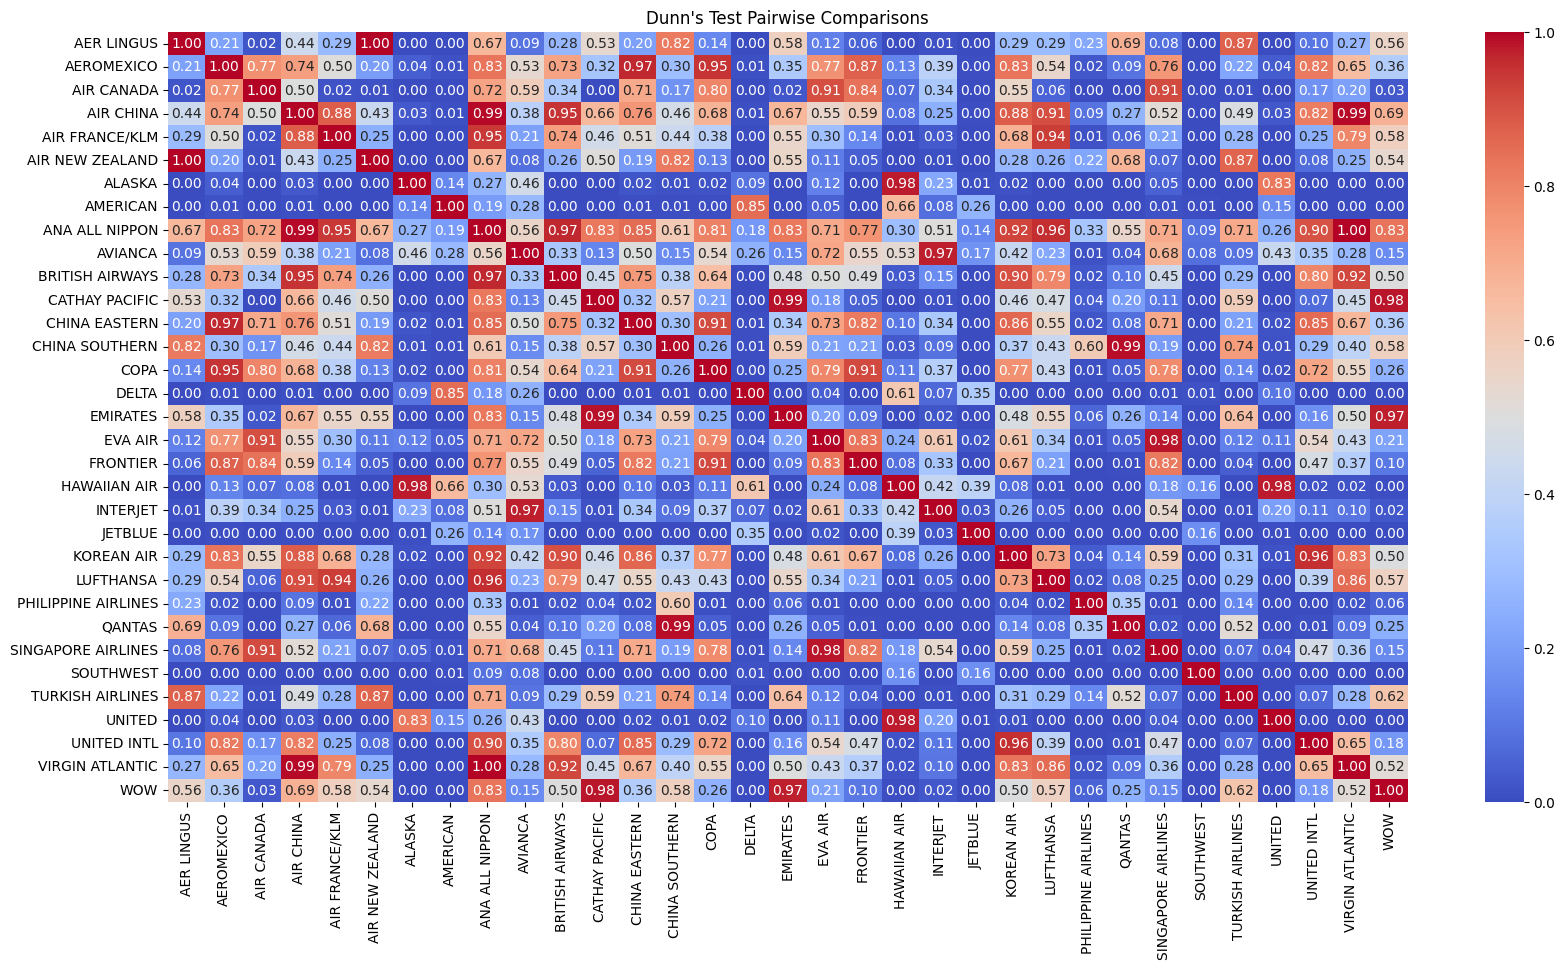

In [86]:
# Plot the results
plt.figure(figsize=(20, 10))
sns.heatmap(dunn_test_result, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Dunn\'s Test Pairwise Comparisons')
plt.show()

In [84]:
# Calculate mean wait times for each airline
mean_wait_times = airlines.groupby('airline')['wait_min'].mean().sort_values(ascending=True)
print(mean_wait_times)

airline
SOUTHWEST              124.663043
JETBLUE                127.145833
HAWAIIAN AIR           132.750000
DELTA                  144.129412
ALASKA                 145.314286
AVIANCA                147.500000
INTERJET               147.777778
UNITED                 151.053232
AMERICAN               153.920000
SINGAPORE AIRLINES     160.625000
EVA AIR                171.000000
AEROMEXICO             171.363636
ANA ALL NIPPON         175.000000
FRONTIER               175.975610
CHINA EASTERN          177.692308
AIR CHINA              178.125000
KOREAN AIR             189.583333
EMIRATES               193.641026
AIR FRANCE/KLM         198.025000
AIR CANADA             198.947368
UNITED INTL            201.477419
CHINA SOUTHERN         202.500000
COPA                   202.687500
VIRGIN ATLANTIC        203.593750
AER LINGUS             203.611111
LUFTHANSA              206.765625
BRITISH AIRWAYS        207.142857
WOW                    211.473684
CATHAY PACIFIC         212.370370
TURKIS

Southwest Airlines stands out with significantly lower wait times compared to most of the other airlines included in the analysis. Specifically, Dunn's Test indicates that Southwest Airlines has a statistically significant shorter wait time compared to several airlines.

Despite Southwest Airlines having a lower average wait time, there are several airlines for which the difference in wait times compared to Southwest is not statistically significant. These airlines include:
- ANA All Nippon Airways
- Avianca
- Hawaiian Airlines
- JetBlue